In [14]:
import datetime
import spiceypy
import numpy as np


spiceypy.furnsh("meta_2.txt")

In [15]:
INIT_TIME_UTC = datetime.datetime(year=2000, month=1, day=1, hour=0, minute=0, second=0)

DELTA_DAYS = 10000
END_TIME_UTC = INIT_TIME_UTC + datetime.timedelta(days=DELTA_DAYS)

INIT_TIME_UTC_STR = INIT_TIME_UTC.strftime("%Y-%m-%dT%H:%M:%S")
END_TIME_UTC_STR = END_TIME_UTC.strftime("%Y-%m-%dT%H:%M:%S")

print(f"Init time in UTC: {INIT_TIME_UTC_STR}")
print(f"End time in UTC: {END_TIME_UTC_STR}")

print(spiceypy.ktotal("ALL"))

Init time in UTC: 2000-01-01T00:00:00
End time in UTC: 2027-05-19T00:00:00
4


In [16]:
INIT_TIME_ET = spiceypy.utc2et(INIT_TIME_UTC_STR)
END_TIME_ET = spiceypy.utc2et(END_TIME_UTC_STR)

print(f"Init time in ET: {INIT_TIME_ET}")
print(f"End time in ET: {END_TIME_ET}")

Init time in ET: -43135.816087188054
End time in ET: 863956869.1851972


In [17]:
print(f"Covered time interval in seconds: {END_TIME_ET - INIT_TIME_ET}")

Covered time interval in seconds: 864000005.0012845


In [18]:
TIME_INTERVAL_ET = np.linspace(INIT_TIME_ET, END_TIME_ET, DELTA_DAYS)
SSB_WRT_SUN_POSITION = []

for TIME_INTERVAL_ET_f in TIME_INTERVAL_ET:
    _position, _ = spiceypy.spkgps(
        targ=0, et=TIME_INTERVAL_ET_f, ref="ECLIPJ2000", obs=10
    )
    SSB_WRT_SUN_POSITION.append(_position)

SSB_WRT_SUN_POSITION = np.array(SSB_WRT_SUN_POSITION)

In [19]:
print(
    "Position (components) of the Solar System Barycentre w.r.t the\n"
    "centre of the Sun (at inital time): \n"
    "X = %s km\n"
    "Y = %s km\n"
    "Z = %s km\n" % tuple(np.round(SSB_WRT_SUN_POSITION[0]))
)

print(
    "Distance between the Solar System Barycentre w.r.t the\n"
    "centre of the Sun (at initial time): \n"
    "d = %s km\n" % round(np.linalg.norm(SSB_WRT_SUN_POSITION[0]))
)

Position (components) of the Solar System Barycentre w.r.t the
centre of the Sun (at inital time): 
X = 1068000.0 km
Y = 417681.0 km
Z = -30845.0 km

Distance between the Solar System Barycentre w.r.t the
centre of the Sun (at initial time): 
d = 1147185 km



In [20]:
_, RADII_SUN = spiceypy.bodvcd(bodyid=10, item="RADII", maxn=3)

RADIUS_SUN = RADII_SUN[0]

SSB_WRT_SUN_POSITION_SCALED = SSB_WRT_SUN_POSITION / RADIUS_SUN

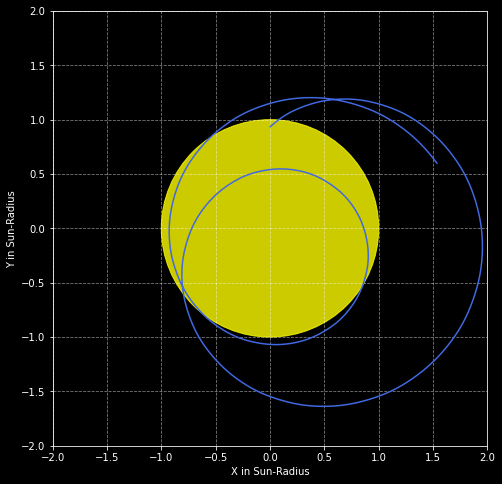

In [21]:
from matplotlib import pyplot as plt

SSB_WRT_SUN_POSITION_SCALED_XY = SSB_WRT_SUN_POSITION_SCALED[:, 0:2]

plt.style.use("dark_background")
FIG, AX = plt.subplots(figsize=(12, 8))

SUN_CIRC = plt.Circle((0.0, 0.0), 1.0, color="yellow", alpha=0.8)
AX.add_artist(SUN_CIRC)

AX.plot(
    SSB_WRT_SUN_POSITION_SCALED_XY[:, 0],
    SSB_WRT_SUN_POSITION_SCALED_XY[:, 1],
    ls="solid",
    color="royalblue",
)

AX.set_aspect("equal")
AX.grid(True, linestyle="dashed", alpha=0.5)
AX.set_xlim(-2, 2)
AX.set_ylim(-2, 2)

AX.set_xlabel("X in Sun-Radius")
AX.set_ylabel("Y in Sun-Radius")

plt.savefig("SSB_WRT_SUN.png", dpi=300)

In [22]:
SSB_WRT_SUN_DISTANCE_SCALED = np.linalg.norm(SSB_WRT_SUN_POSITION_SCALED, axis=1)

print("Computation time: %s days\n" % DELTA_DAYS)

SSB_OUTSIDE_SUN_DELTA_DAYS = len(np.where(SSB_WRT_SUN_DISTANCE_SCALED > 1)[0])

print(
    "Fraction of time where the SSB\n"
    "was outside the Sun: %s %%" % (100 * SSB_OUTSIDE_SUN_DELTA_DAYS / DELTA_DAYS)
)

Computation time: 10000 days

Fraction of time where the SSB
was outside the Sun: 64.64 %
